In [92]:
import pandas as pd 
import seaborn as sb 

In [93]:

df = pd.read_csv(r"C:\Users\CR\Desktop\datasets_used\data_visualizations\london_houses.csv")
df.head()


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [94]:
#We clean our data dropping null values
df = df.dropna()

In [95]:
#We get the count of values with a neighborhood called "Marylebone"
marylebone_neighborhood = df["Neighborhood"] == "Marylebone"
marylebone_neighborhood.value_counts()

Neighborhood
False    887
True     113
Name: count, dtype: int64

In [96]:
#we create a new column for count the number of rooms for each property
df["Total Rooms"] = df["Bedrooms"] + df["Bathrooms"]
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),Total Rooms
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,5
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,3
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600,8
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000,6
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000,5


In [97]:
#We get the total square meters by address and the max one
square_meters = df.groupby("Address")["Square Meters"].sum()
print(square_meters)
print("max area:",square_meters.max())


Address
1 Baker Street           216
1 Regent Street          118
10 Bond Street           229
10 Fleet Street          210
10 Park Lane             173
                        ... 
99 Bond Street           375
99 Camden High Street    191
99 Fleet Street          123
99 Oxford Street         217
99 Piccadilly Circus     132
Name: Square Meters, Length: 770, dtype: int64
max area: 739


In [98]:
df["Price (£)"] = df["Price (£)"].astype(float)
df.head()


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),Total Rooms
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200.0,5
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000.0,3
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600.0,8
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000.0,6
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000.0,5


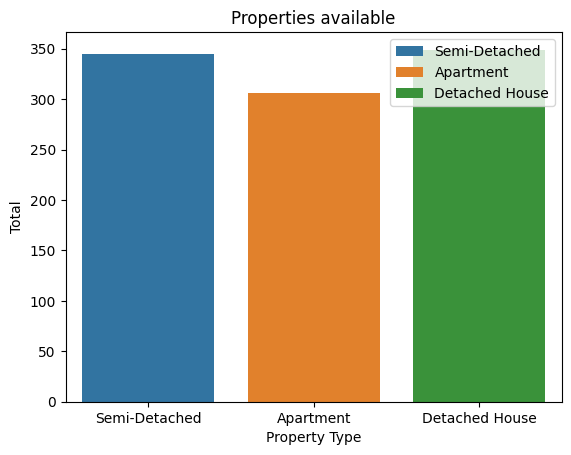

In [99]:
property_plot = sb.countplot(data=df,x="Property Type",hue="Property Type",legend="auto")
property_plot.set_title("Properties available")
property_plot.set_ylabel("Total")
property_plot.legend(["Semi-Detached","Apartment","Detached House"])

Text(0.5, 1.0, 'Properties Prices')

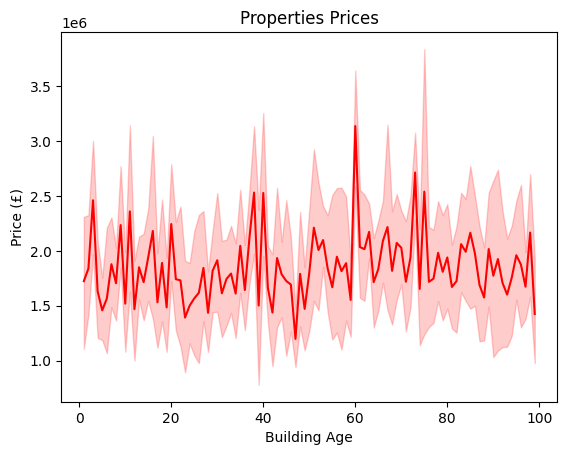

In [100]:
# We create a lineplot to see if the older the property, the higher the price.
price_lineplot = sb.lineplot(data=df,x="Building Age",y="Price (£)",dashes=True,color="r")
price_lineplot.set_title("Properties Prices")


<Axes: ylabel='Square Meters'>

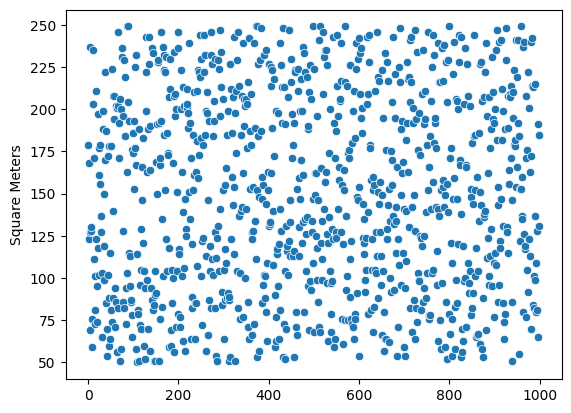

In [101]:
sb.scatterplot(df["Square Meters"])
